In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
from scipy.spatial import distance
import time

In [3]:
t = Table.read('NGC2264.vot', format='votable')
print(t.colnames)
DEC = t['_DEJ2000']
RA = t["_RAJ2000"]
print(len(RA))
print(RA[0])

['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']
31999
99.7000076


C:\Users\Kevin.Hall\Anaconda3\lib\site-packages\numpy\ma\core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


31999


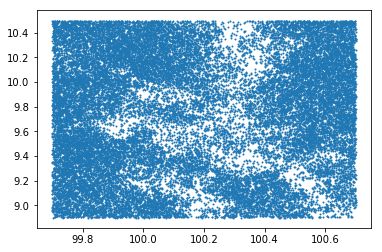

IndexError: too many indices for array

In [4]:
para = t['Plx'] 
dist = 1000/para 
print(len(dist))
DEC = t['_DEJ2000']
Mags = t['__Gmag_']

plt.scatter(RA,DEC,s=1.0)
plt.show()
RA = np.array(RA)
DEC = np.array(DEC)
star_coords = np.array([RA,DEC])

firstRegion = []
regionRA = 10.2
regionDEC = 100.1
for i in range(len(Mags)):
    if (regionDEC + 0.2) > DEC[i] > (regionDEC - 0.2) and (regionRA-0.1) < RA[i] < (regionRA+0.1):
        firstRegion.append([Mags[i],RA[i],DEC[i]])

firstRegion = np.array(firstRegion)
plt.scatter(firstRegion[:,1],firstRegion[:,2],s=1.0,c='r')
plt.show()
plt.hist(firstRegion[:,0])
plt.show()
meanMag = np.mean(firstRegion[:,0])
medianMag = np.median(firstRegion[:,0])
print('Average Mag ')

In [31]:
from scipy.spatial import cKDTree

def findDistancesTree(imageSize, points):
    tree = cKDTree(points)
    image = zeros(imageSize)
    for x in range(0,imageSize[1]):
        for y in range(0,imageSize[0]):
            image[y,x] = tree.query([x,y])[0]
    return image

findDistancesTree(star_coords,[len(RA),len(DEC)])

ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

31999


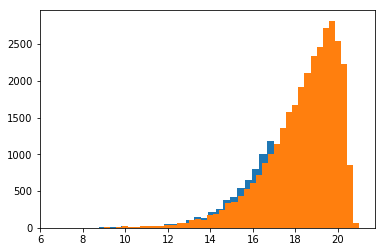

15.5159
6178


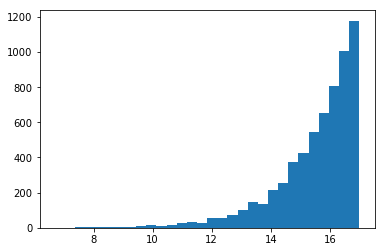

In [14]:

print(len(Mags))

plt.hist(Mags,50)
plt.show()

odd_list = [x for x in Mags if x < 17 ]
#print(odd_list)

print(np.mean(odd_list))
print(len(odd_list))
plt.hist(odd_list,30)
plt.show()

In [8]:
X = [[0], [3], [1]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X) 
NearestNeighbors(algorithm='auto', leaf_size=30)
A = neigh.kneighbors_graph(X)
print(A)

  (0, 0)	1.0
  (0, 2)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (2, 0)	1.0


In [5]:
ngc_stars = []
for i in range(len(RA)):
    ngc_stars.append([RA[i],DEC[i]])
    
ngc_stars = np.array(ngc_stars)
print(ngc_stars[0])




[ 99.7000076   9.1267551]


In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = ngc_stars
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)
distances = nbrs.kneighbors(X)

#print(ngc_stars[:,1])
distances = np.array(distances)
#print(distances)
#print('length:',len(distances[0]))
dist_list = distances[0]
final_distances = []
for dist in (dist_list):
    final_distances.append(dist[1])

print(np.median(final_distances))
print(np.mean(final_distances))
#plt.hist(final_distances,40)
#plt.show()
        
            

0.00307402722988
0.00344944097661


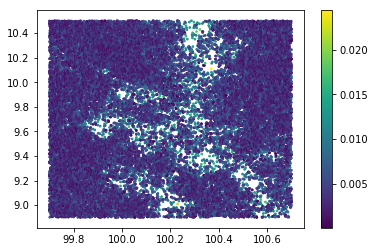

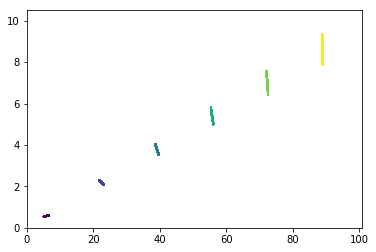

In [7]:
plt.scatter(RA,DEC,c=final_distances,s=3.0)
plt.colorbar()
plt.show()
RA2=[RA,final_distances]
DEC2 =[DEC,final_distances]
plt.contour(RA2,DEC2,np.transpose(ngc_stars))
plt.show()

In [8]:
starData = []
for i in range(len(RA)):
    starData.append([RA[i],DEC[i],final_distances[i]])
starData = np.array(starData)
print(starData[0])

[  9.97000076e+01   9.12675510e+00   1.53277193e-03]


In [12]:
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi)
    X, Y = meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(RA,DEC,final_distances)
plt.contour(X,Y,Z)

RuntimeError: To use interp='nn' (Natural Neighbor interpolation) in griddata, natgrid must be installed. Either install it from http://github.com/matplotlib/natgrid or use interp='linear' instead.

In [19]:
1+1

2

In [11]:
X, Y = np.meshgrid(RA,DEC,sparse=True)
#Z = f(X,Y)
Z = X+Y
#for i in range(len(RA)):
#    Z.append([RA[i]*final_distances[i],DEC[i]*final_distances[i]])
plt.contour(X,Y,Z)
plt.show()

TypeError: Shape of x does not match that of z: found (1, 31999) instead of (31999, 31999).

In [17]:
print(np.min(RA),np.max(RA))
print(np.min(DEC),np.max(DEC))
data = np.array([RA,DEC])
data = np.transpose(data)
print(data)


99.7000076 100.6999986
8.9000351 10.4999863
[[  99.7000076    9.1267551]
 [  99.7000159    9.8510335]
 [  99.7000994    9.5866719]
 ..., 
 [ 100.6999437    9.21728  ]
 [ 100.6999466   10.4064778]
 [ 100.6999986    9.8876859]]


0.0714279285714
15.45717535


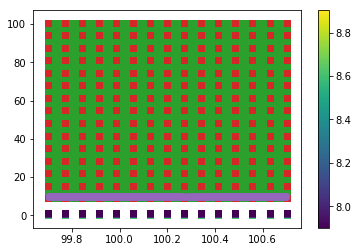

240


In [21]:
import copy
from scipy import spatial
from scipy.spatial import KDTree

xgrid = np.linspace(np.min(RA),np.max(RA),15)
ygrid = np.linspace(np.min(DEC),np.max(RA),15)
X, Y = np.meshgrid(xgrid,ygrid)
plt.scatter(X,Y,marker='s',s=30.0)

print(X[0,2]-X[0,1])
X = np.array(X)
Y = np.array(Y)
print(Y[1,0])
#print(X[0,0:len(X)])
array = [X[1,0:len(Y)],Y[2,0:len(X)]]
array = np.array(array)
Xvalues = (array[0,0:len(array[1])])
test_array = []
count = 0
yval = 0 - (X[0,13]-X[0,12])
for x in range(len(X)):
    for i in (Xvalues):
        if(x == 0):
            test_array.append([i,0])
        test_array.append([i,(yval-((1+x)*yval))])

distArray = []
for i in range(len(test_array)):
        dat = []
        dat = copy.copy(data)
        #dat.append(test_array[i])
        #dat = np.concatenate((dat,test_array[i]),axis=0)
        dat = np.vstack((dat,test_array[i]))
        tree = KDTree(dat,2)
        dist, ind = tree.query(dat[len(dat)-1], k=7)
        distArray.append(dist[5])
    
    
test_array = np.array(test_array)
plt.scatter(test_array[:,0],test_array[:,1],marker='s',c=distArray)
plt.colorbar()
plt.scatter(data[:,0],data[:,1],s=8.0)
plt.show()
print(len(distArray))

In [14]:
import copy
from scipy import spatial
from scipy.spatial import KDTree

def KDneighbor(array):
    tree = KDTree(array,3000)
    dist, ind = tree.query(array[len(array)-1], k=7)
    return(dist[5])

[ 99.7000076   9.1267551]
0.0714279285714
9.01431732857
Length of distArray: 240
Total Time(s): 2.37870717048645


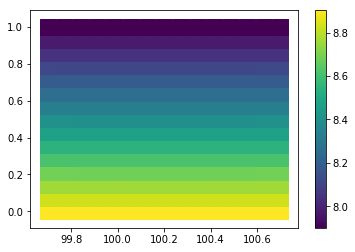

240
240
For loop time: 0.0010006427764892578


In [19]:
import numpy as np
import copy
import time

start = time.time()
data =  np.array([RA,DEC])
#tree = KDTree(data,2)              
#dist, ind = tree.query(data[2], k=3) 
#print(dist)
data = np.transpose(data)
print(data[0])
xgrid = np.linspace(np.min(RA),np.max(RA),15)
ygrid = np.linspace(np.min(DEC),np.max(DEC),15)
X, Y = np.meshgrid(xgrid,ygrid)
#plt.scatter(X,Y,marker='s',s=30.0)

print(X[0,2]-X[0,1])
X = np.array(X)
Y = np.array(Y)
print(Y[1,0])
#print(X[0,0:len(X)])
array = [X[1,0:len(Y)],Y[2,0:len(X)]]
array = np.array(array)
Xvalues = (array[0,0:len(array[1])])
test_array = []
count = 0
yval = 0 - (X[0,13]-X[0,12])
time2 = time.time()
for x in range(len(X[0])):
    for i in (Xvalues):
        if(x == 0):
            test_array.append([i,0])
        test_array.append([i,(yval-((1+x)*yval))])
end2 = time.time() 
    
hi = 0
#print(Y[6])
#for y in 
allDists = []
# for j in range(len(Y)):
#     distArray = []
#     Yval = Y[j-1,0]
#     if(j > 0):
#         test_array[test_array == Yval] = Y[j,0]
#         print('\nTest_Array\n',test_array)
#     for i in range(len(test_array)):
#         dat = []
#         dat = copy.copy(data)
#         #dat.append(test_array[i])
#         #dat = np.concatenate((dat,test_array[i]),axis=0)
#         dat = np.vstack((dat,test_array[i]))
#         tree = KDTree(dat,2)
#         dist, ind = tree.query(dat[len(dat)-1], k=3)
#         distArray.append(dist[1])
#     allDists.append(distArray)
distArray = []
time1 = time.time()
# for i in range(len(test_array)):
#         dat = []
#         dat = copy.copy(data)
#         #dat.append(test_array[i])
#         #dat = np.concatenate((dat,test_array[i]),axis=0)
#         dat = np.vstack((dat,test_array[i]))
#         tree = KDTree(dat,2)
# #         dist, ind = tree.query(dat[len(dat)-1], k=7)
#         dist, ind = tree.query(dat, k=7)
#         distArray.append(dist[5])
dat = copy.copy(data)
#dat = vstack(dat)
distArray = list(map((lambda x: KDneighbor(np.vstack((dat,x)))), test_array))
print('Length of distArray:', len(distArray))

end1 = time.time()  
print('Total Time(s):', (end1-time1))
#print('Length of DistArray:', distArray)
test_array = np.array(test_array)
plt.scatter(test_array[:,0],test_array[:,1],marker='s',c=distArray,s=245.0)
plt.colorbar()
#plt.scatter(data[:,0],data[:,1],s=8.0,c='orange')
plt.show()
print(len(distArray))
end = time.time()

print(len(distArray))
print('For loop time:', end2 - time2)

In [20]:
plt.contour(distArray)

TypeError: Input must be a 2D array.